<a href="https://colab.research.google.com/github/Faezeh-Maleki/sentiment-analysis/blob/main/Reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

Episode 100: Total Reward = 9.0
Episode 200: Total Reward = 18.0
Episode 300: Total Reward = 26.0
Episode 400: Total Reward = 13.0
Episode 500: Total Reward = 100.0
Episode 600: Total Reward = 100.0
Episode 700: Total Reward = 100.0
Episode 800: Total Reward = 100.0
Episode 900: Total Reward = 100.0
Episode 1000: Total Reward = 100.0


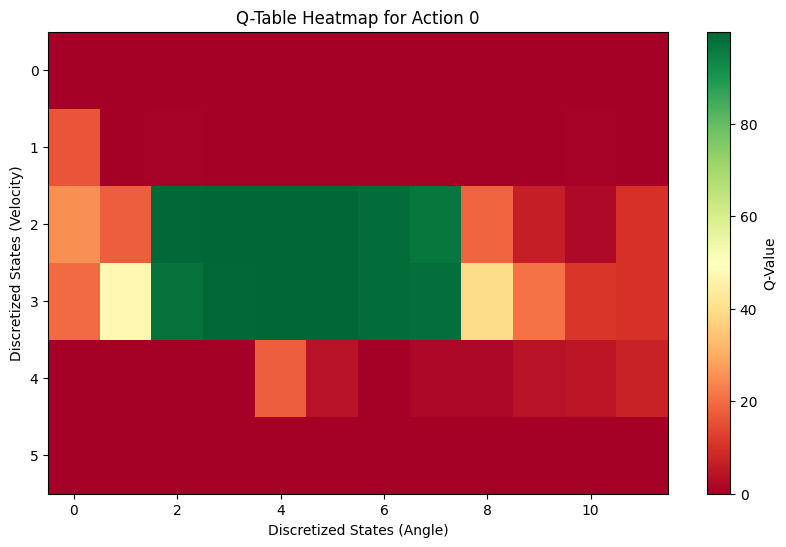

In [3]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Q-learning parameters
num_episodes = 1000         # Number of episodes to train the agent
max_steps = 100             # Maximum steps allowed per episode
learning_rate = 0.1         # Alpha: Learning rate
discount_factor = 0.99      # Gamma: Discount factor for future rewards
epsilon = 1.0               # Exploration rate (epsilon for epsilon-greedy policy)
min_epsilon = 0.01          # Minimum epsilon value for exploration
epsilon_decay = 0.995       # Rate at which epsilon decays after each episode

# Discretization of the state space for Q-table
state_space_bins = (1, 1, 6, 12)  # Binning each dimension of the state space

# Initialize the Q-table to zeros
q_table = np.zeros(state_space_bins + (env.action_space.n,))

# Function to discretize continuous states into discrete bins
def discretize_state(state):
    upper_bounds = [env.observation_space.high[0], 4.8, env.observation_space.high[2], np.radians(50)]
    lower_bounds = [env.observation_space.low[0], -4.8, env.observation_space.low[2], -np.radians(50)]
    ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
    new_state = [int(round((state_space_bins[i] - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(state_space_bins[i] - 1, max(0, new_state[i])) for i in range(len(new_state))]
    return tuple(new_state)

# Function to choose an action using the epsilon-greedy policy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Exploration: randomly choose an action
    else:
        return np.argmax(q_table[state])  # Exploitation: choose the action with the highest Q-value

# Q-learning algorithm
for episode in range(num_episodes):
    state = discretize_state(env.reset())  # Reset the environment and get initial state
    done = False
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(state)  # Choose action based on current state
        next_state, reward, done, _ = env.step(action)  # Perform action and observe result
        next_state = discretize_state(next_state)

        # Update Q-value using the Q-learning formula
        best_next_action = np.argmax(q_table[next_state])
        q_table[state][action] += learning_rate * (reward + discount_factor * q_table[next_state][best_next_action] - q_table[state][action])

        state = next_state  # Move to the next state
        total_reward += reward

        if done:  # Stop if the episode is done
            break

    # Decrease epsilon after each episode to reduce exploration over time
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Print progress every 100 episodes
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Close the environment after training
env.close()

# Visualize the Q-table for action 0 as a heatmap
q_values_to_plot = q_table[:, :, :, :, 0].reshape(-1, 12)  # Reshape for visualization

plt.figure(figsize=(10, 6))
plt.title('Q-Table Heatmap for Action 0')
plt.xlabel('Discretized States (Angle)')
plt.ylabel('Discretized States (Velocity)')
plt.imshow(q_values_to_plot, cmap='RdYlGn', aspect='auto')  # Red-Yellow-Green color map
plt.colorbar(label='Q-Value')
plt.show()
